Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 64)                5952      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 6,602
Trainable params: 6,602
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5213 - accuracy: 0.8407
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2673 - accuracy: 0.9227
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2093 - accuracy: 0.9399
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1895 - accuracy: 0.9452
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1769 - accuracy: 0.9495

========

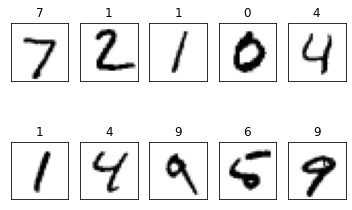

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

# MNIST 데이터 로드
(train_images, train_labels), (test_images, test_labels) = load_data()
# train_images's shape : (nb_samples, img_height, img_width)
# input data of RNN : (nb_samples, timeseteps, input_dim)

# 픽셀값 0~1 정규화
train_images = train_images / 255.0
test_images = test_images / 255.0

# 원 핫 인코딩으로 변경
one_hot_train_labels = to_categorical(train_labels, 10)
one_hot_test_labels = to_categorical(test_labels, 10)

# 모델 구성 (model = tf.keras.models.Sequential())
model = Sequential()
model.add(SimpleRNN(units=64, input_shape = (28, 28), return_sequences=False)) # return_sequences=Flase는 맨 마지막만 출력(default는 False) / True로 하면 매번 출력값을 계산
model.add(Dense(10, activation='softmax'))

# 모델 학습을 위한 최적화 함수 및 손실 함수 등 설정
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 구조 출력
model.summary()

# 모델 학습 수행
history = model.fit(train_images, one_hot_train_labels, epochs=5, batch_size=32)

# 모델 평가
print("\n===========================test results===========================")
labels = model.predict(test_images)

# .evaluate()함수의 반환값 : 평가된 [0]loss, [1]accuracy
print("\n Accuracy: %.4f" % (model.evaluate(test_images, one_hot_test_labels)[1]))

# 결과 이미지로 출력
fig = plt.figure()
for i in range(10):
  subplot = fig.add_subplot(2, 5, i+1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%s' % np.argmax(labels[i]))
  subplot.imshow(test_images[i], cmap=plt.cm.gray_r)
plt.show()
print("\n==================================================================")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 28, 64)            5952      
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                57376     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 63,658
Trainable params: 63,658
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2286 - accuracy: 0.9288
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1094 - accuracy: 0.9663
Epoch 3/5
1875/1875 [=======================

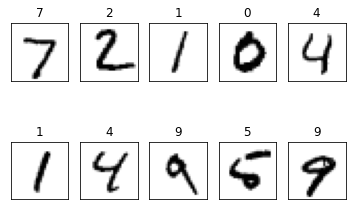

In [ ]:
# return_sequences=True로 변경해서 해보기

import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.layers import SimpleRNN, Dense, Flatten
from tensorflow.keras.optimizers import Adam

# MNIST 데이터 로드
(train_images, train_labels), (test_images, test_labels) = load_data()
# train_images's shape : (nb_samples, img_height, img_width)
# input data of RNN : (nb_samples, timeseteps, input_dim)

# 픽셀값 0~1 정규화
train_images = train_images / 255.0
test_images = test_images / 255.0

# 원 핫 인코딩으로 변경
one_hot_train_labels = to_categorical(train_labels, 10)
one_hot_test_labels = to_categorical(test_labels, 10)

# 모델 구성 (model = tf.keras.models.Sequential())
model = Sequential()
model.add(SimpleRNN(units=64, input_shape = (28, 28), return_sequences=True)) # True로 하면 매번 출력값을 계산
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 학습을 위한 최적화 함수 및 손실 함수 등 설정
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 구조 출력
model.summary()

# 모델 학습 수행
history = model.fit(train_images, one_hot_train_labels, epochs=5, batch_size=32)

# 모델 평가
print("\n===========================test results===========================")
labels = model.predict(test_images)

# .evaluate()함수의 반환값 : 평가된 [0]loss, [1]accuracy
print("\n Accuracy: %.4f" % (model.evaluate(test_images, one_hot_test_labels)[1]))

# 결과 이미지로 출력
fig = plt.figure()
for i in range(10):
  subplot = fig.add_subplot(2, 5, i+1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%s' % np.argmax(labels[i]))
  subplot.imshow(test_images[i], cmap=plt.cm.gray_r)
plt.show()
print("\n==================================================================")

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_6 (SimpleRNN)     (None, 28, 64)            5952      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 28, 64)            8256      
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 28, 32)            3104      
_________________________________________________________________
flatten_1 (Flatten)          (None, 896)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                28704     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 46,346
Trainable params: 46,346
Non-trainable params: 0
__________________________________________________

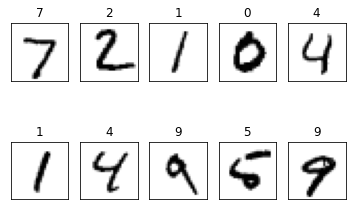

In [ ]:
# 심층 RNN 구성해보기 (2개의 은닉층)

# return_sequences=True로 변경해서 해보기

import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.layers import SimpleRNN, Dense, Flatten
from tensorflow.keras.optimizers import Adam

# MNIST 데이터 로드
(train_images, train_labels), (test_images, test_labels) = load_data()
# train_images's shape : (nb_samples, img_height, img_width)
# input data of RNN : (nb_samples, timeseteps, input_dim)

# 픽셀값 0~1 정규화
train_images = train_images / 255.0
test_images = test_images / 255.0

# 원 핫 인코딩으로 변경
one_hot_train_labels = to_categorical(train_labels, 10)
one_hot_test_labels = to_categorical(test_labels, 10)

# 모델 구성 (model = tf.keras.models.Sequential())
model = Sequential()
model.add(SimpleRNN(units=64, return_sequences=True, input_shape = (28, 28))) # True로 하면 매번 출력값을 계산
model.add(SimpleRNN(units=64, return_sequences=True))
model.add(SimpleRNN(units=32, return_sequences=True))
model.add(Flatten())
model.add(Dense(32, activation='relu')) # 벡터가 너무 크니까 바로 10개의 출력으로 만들지 말고 32개의 노드로 구성된 레이어를 추가하여 크기를 줄임으로써 성능이 좋아지도록 한다.
model.add(Dense(10, activation='softmax'))

# 모델 학습을 위한 최적화 함수 및 손실 함수 등 설정
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 구조 출력
model.summary()

# 모델 학습 수행
history = model.fit(train_images, one_hot_train_labels, epochs=5, batch_size=32)

# 모델 평가
print("\n===========================test results===========================")
labels = model.predict(test_images)

# .evaluate()함수의 반환값 : 평가된 [0]loss, [1]accuracy
print("\n Accuracy: %.4f" % (model.evaluate(test_images, one_hot_test_labels)[1]))

# 결과 이미지로 출력
fig = plt.figure()
for i in range(10):
  subplot = fig.add_subplot(2, 5, i+1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%s' % np.argmax(labels[i]))
  subplot.imshow(test_images[i], cmap=plt.cm.gray_r)
plt.show()
print("\n==================================================================")